<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/*cosian%20dist_20%20instance_far%20vs%20near_2000%20pair_%208%20outer%20shift_Threshold%20verification%20with%20Middle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

** subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''


'\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n** subjects  (train subject (ts) , new subject (ns) ):\n\n1) Train subject i (ts[i] )\n2) Train Subject i and Train Subject j (ts[i] , ts[j] )\n3) Train subject and New subject  (ts , ns)\n4) New subject i ( ns[i] )\n5) New Subject i and New Subject j (ns[i] , ns[j] )\n\n'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!pip install mne

     |████████████████████████████████| 6.4MB 2.8MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =8  # outer step len
sample_per_window = 160
window_len= 20
batch_size=64

#Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
#Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]


In [47]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model



# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Automatically created module for IPython interactive environment


In [8]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Do you want to set the path:
    /content/drive/My Drive/Deep Results/Database
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.in

In [78]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sample_per_window - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
subject_img_number

1171

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        e = e+1

        # Orthogonal Channel
        #DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        #DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsNormal[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        
        
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, sample_per_window), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsNormal[r][i][0+j*OuterSampleShift + z*InnerSampleShift:sample_per_window+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


In [0]:
#model.save('/content/drive/My Drive/mymodels/160newmodel_task1.h5')

In [82]:
model = load_model('/content/drive/My Drive/mymodels/model2_2.h5')
model.summary()
model.pop()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 20, 160, 64)       11584     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 80, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 78, 128)        73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 39, 128)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 37, 256)        295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 18, 256)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
def subject_Predict_generator(batch_size, mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject

In [0]:
total_vector=[]
subject_img_idx_array = np.arange(subject_img_number)

for i in range(109):
  Si_vectors = subject_Predict_generator(len(subject_img_idx_array), model, [i], subject_img_idx_array)
  total_vector.append(Si_vectors)



In [84]:
import h5py
#hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors_model2_2_160spw_160shift.h5', 'w')
#hf.create_dataset('/content/drive/My Drive/Deep Results/dataset_total_vectors', data=total_vector)
#hf.close()
#hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors_model2_2_160spw_160shift.h5', 'r')
#vec = hf.get('/content/drive/My Drive/Deep Results/dataset_total_vectors')
#vec
hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors2.h5', 'r')
vec = hf.get('/content/drive/My Drive/Deep Results/dataset_total_vectors')
vec

<HDF5 dataset "dataset_total_vectors": shape (109, 1171, 64), type "<f4">

In [0]:
### verification with middle of samples

def VerifySubject(threshold, s1, smp1, s2, smp2):
  list_d =[]

  for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
    d= distance.cosine(vec[s1][smp1[i]], vec[s2][smp2[i]])
    list_d.append(d)
  midd = statistics.median_low(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


array([0, 1])

In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  
  threshold = 0
  pair_number = 2000
  sample_img_num = 20
  Batch_size = 20
  ITER = pair_number //2


  path = "/content/drive/My Drive/z_Middle Verification Threshold_EER/"+"h5 file-cosian dist task1_far vs near sample" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,30):

      threshold =0.160+ (j*0.002)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled1 = np.arange(0,20)
          #np.random.shuffle(pre_S1_img_shuffled)

          pre_S1_img_shuffled2 = np.arange(1140,1160)
          #np.random.shuffle(pre_S2_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled1
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled2

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=np.arange(0,20)
          #np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )

  ##plot
  plt.plot(list_FRR, list_FAR  ) 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()
  plt.savefig(png_completeName) 


  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j], list_FAR[j], list_FRR[j] , list_EER[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])


Successfully created the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task1_far vs near sample20sample num_2000pair_ouer shift8 
0.152 . 
 96.9 % 
 true_result: 1938 false_result: 62 
 TP: 966 FN: 34 FRR: 0.034 
 TN: 972 FP: 28 FAR: 0.028 
 EER: 0.031 

0.154 . 
 96.1 % 
 true_result: 1922 false_result: 78 
 TP: 957 FN: 43 FRR: 0.043 
 TN: 965 FP: 35 FAR: 0.035 
 EER: 0.039 

0.156 . 
 96.65 % 
 true_result: 1933 false_result: 67 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.0335 

0.158 . 
 96.45 % 
 true_result: 1929 false_result: 71 
 TP: 967 FN: 33 FRR: 0.033 
 TN: 962 FP: 38 FAR: 0.038 
 EER: 0.035500000000000004 

0.16 . 
 96.25 % 
 true_result: 1925 false_result: 75 
 TP: 961 FN: 39 FRR: 0.039 
 TN: 964 FP: 36 FAR: 0.036 
 EER: 0.0375 

0.162 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 959 FN: 41 FRR: 0.041 
 TN: 965 FP: 35 FAR: 0.035 
 EER: 0.038000000000000006 

0.164 . 
 95.45 % 
 true_result: 1909 fals

No handles with labels found to put in legend.


0.22799999999999998 . 
 92.05 % 
 true_result: 1841 false_result: 159 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 841 FP: 159 FAR: 0.159 
 EER: 0.0795 



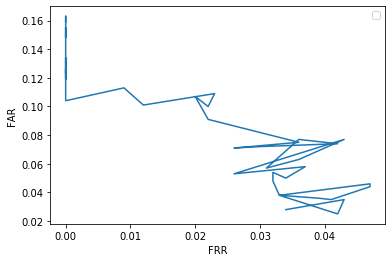

In [93]:
#1. train subject , train subject

counter_true_false_result(0,89, 0,89) 


Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task1_far vs near sample20sample num_2000pair_ouer shift8 failed
0.152 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 959 FN: 41 FRR: 0.041 
 TN: 965 FP: 35 FAR: 0.035 
 EER: 0.038000000000000006 

0.154 . 
 95.9 % 
 true_result: 1918 false_result: 82 
 TP: 959 FN: 41 FRR: 0.041 
 TN: 959 FP: 41 FAR: 0.041 
 EER: 0.041 

0.156 . 
 95.75 % 
 true_result: 1915 false_result: 85 
 TP: 964 FN: 36 FRR: 0.036 
 TN: 951 FP: 49 FAR: 0.049 
 EER: 0.042499999999999996 

0.158 . 
 95.0 % 
 true_result: 1900 false_result: 100 
 TP: 944 FN: 56 FRR: 0.056 
 TN: 956 FP: 44 FAR: 0.044 
 EER: 0.05 

0.16 . 
 95.5 % 
 true_result: 1910 false_result: 90 
 TP: 949 FN: 51 FRR: 0.051 
 TN: 961 FP: 39 FAR: 0.039 
 EER: 0.045 

0.162 . 
 95.1 % 
 true_result: 1902 false_result: 98 
 TP: 954 FN: 46 FRR: 0.046 
 TN: 948 FP: 52 FAR: 0.052 
 EER: 0.049 

0.164 . 
 96.0 % 
 true_result: 1920 false_result

No handles with labels found to put in legend.


0.208 . 
 93.5 % 
 true_result: 1870 false_result: 130 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 870 FP: 130 FAR: 0.13 
 EER: 0.065 



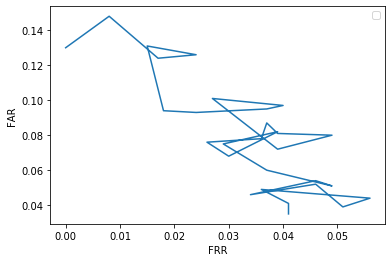

In [95]:
#2. train subject , new subject

counter_true_false_result(0,89, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task1_far vs near sample20sample num_2000pair_ouer shift8 failed
0.192 . 
 77.9 % 
 true_result: 1558 false_result: 442 
 TP: 661 FN: 339 FRR: 0.339 
 TN: 897 FP: 103 FAR: 0.103 
 EER: 0.221 

0.194 . 
 78.95 % 
 true_result: 1579 false_result: 421 
 TP: 677 FN: 323 FRR: 0.323 
 TN: 902 FP: 98 FAR: 0.098 
 EER: 0.21050000000000002 

0.196 . 
 79.5 % 
 true_result: 1590 false_result: 410 
 TP: 681 FN: 319 FRR: 0.319 
 TN: 909 FP: 91 FAR: 0.091 
 EER: 0.20500000000000002 

0.198 . 
 78.85 % 
 true_result: 1577 false_result: 423 
 TP: 706 FN: 294 FRR: 0.294 
 TN: 871 FP: 129 FAR: 0.129 
 EER: 0.2115 

0.2 . 
 80.5 % 
 true_result: 1610 false_result: 390 
 TP: 718 FN: 282 FRR: 0.282 
 TN: 892 FP: 108 FAR: 0.108 
 EER: 0.19499999999999998 

0.202 . 
 80.15 % 
 true_result: 1603 false_result: 397 
 TP: 722 FN: 278 FRR: 0.278 
 TN: 881 FP: 119 FAR: 0.119 
 EER: 0.1985 

0.2040000000000000

No handles with labels found to put in legend.


0.248 . 
 81.1 % 
 true_result: 1622 false_result: 378 
 TP: 874 FN: 126 FRR: 0.126 
 TN: 748 FP: 252 FAR: 0.252 
 EER: 0.189 



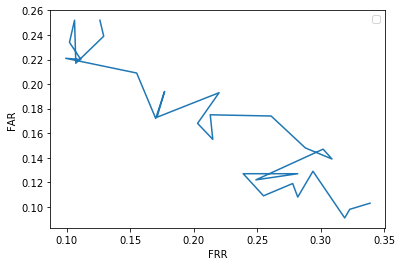

In [100]:
#3. new subject , new subject

counter_true_false_result(90,107, 0,89)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task1_far vs near sample20sample num_2000pair_ouer shift8 failed
0.192 . 
 75.0 % 
 true_result: 1500 false_result: 500 
 TP: 660 FN: 340 FRR: 0.34 
 TN: 840 FP: 160 FAR: 0.16 
 EER: 0.25 

0.194 . 
 76.05 % 
 true_result: 1521 false_result: 479 
 TP: 680 FN: 320 FRR: 0.32 
 TN: 841 FP: 159 FAR: 0.159 
 EER: 0.2395 

0.196 . 
 74.65 % 
 true_result: 1493 false_result: 507 
 TP: 659 FN: 341 FRR: 0.341 
 TN: 834 FP: 166 FAR: 0.166 
 EER: 0.2535 

0.198 . 
 77.2 % 
 true_result: 1544 false_result: 456 
 TP: 736 FN: 264 FRR: 0.264 
 TN: 808 FP: 192 FAR: 0.192 
 EER: 0.228 

0.2 . 
 77.3 % 
 true_result: 1546 false_result: 454 
 TP: 717 FN: 283 FRR: 0.283 
 TN: 829 FP: 171 FAR: 0.171 
 EER: 0.22699999999999998 

0.202 . 
 76.3 % 
 true_result: 1526 false_result: 474 
 TP: 716 FN: 284 FRR: 0.284 
 TN: 810 FP: 190 FAR: 0.19 
 EER: 0.237 

0.20400000000000001 . 
 74.2 % 
 true_result: 1484

No handles with labels found to put in legend.


0.248 . 
 72.55 % 
 true_result: 1451 false_result: 549 
 TP: 884 FN: 116 FRR: 0.116 
 TN: 567 FP: 433 FAR: 0.433 
 EER: 0.2745 



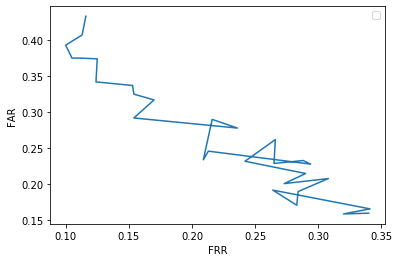

In [101]:
#4. new subject , new subject

counter_true_false_result(90,107, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/h5 file-cosian dist task1_far vs near sample20sample num_2000pair_ouer shift8 failed
0.162 . 
 93.7 % 
 true_result: 1874 false_result: 126 
 TP: 914 FN: 86 FRR: 0.086 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.063 

0.164 . 
 92.7 % 
 true_result: 1854 false_result: 146 
 TP: 899 FN: 101 FRR: 0.101 
 TN: 955 FP: 45 FAR: 0.045 
 EER: 0.07300000000000001 

0.166 . 
 92.8 % 
 true_result: 1856 false_result: 144 
 TP: 914 FN: 86 FRR: 0.086 
 TN: 942 FP: 58 FAR: 0.058 
 EER: 0.072 

0.168 . 
 93.05 % 
 true_result: 1861 false_result: 139 
 TP: 912 FN: 88 FRR: 0.088 
 TN: 949 FP: 51 FAR: 0.051 
 EER: 0.06949999999999999 

0.17 . 
 92.9 % 
 true_result: 1858 false_result: 142 
 TP: 920 FN: 80 FRR: 0.08 
 TN: 938 FP: 62 FAR: 0.062 
 EER: 0.07100000000000001 

0.17200000000000001 . 
 94.3 % 
 true_result: 1886 false_result: 114 
 TP: 923 FN: 77 FRR: 0.077 
 TN: 963 FP: 37 FAR: 0.037 
 EER: 0.056999999999999995 

0.1

No handles with labels found to put in legend.


0.218 . 
 90.2 % 
 true_result: 1804 false_result: 196 
 TP: 939 FN: 61 FRR: 0.061 
 TN: 865 FP: 135 FAR: 0.135 
 EER: 0.098 



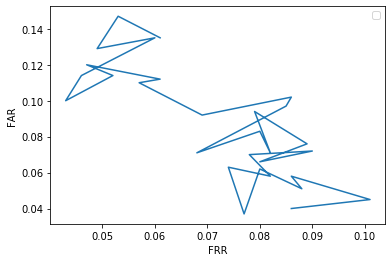

In [106]:
#5. all subject , all subject

counter_true_false_result(0,107, 0,107)